# 0.0 Desafio

## Desafio Data Analyst ConexaLabs 2020

### O desafio
Escolha um dos Datasets disponibilisados e aplique técnicas de análise de dados afim de criar insights que possam gerar algum valor aos dados.

### Dados
Você poderá encontrar os datasets aqui:

#### Venda de Jogos de Digitais (escolhido)

Passageiros do Titanic

### Catálogo de dados

Campo:       Descrição

Name:	     Nome do jogo 

Platform:	  Plataforma de lançamento dos jogos (PC, PS4, etc.)

Year:	      Ano de lançamento do jogo

Genre:	      Gênero do jogo

Publisher:	  Editora do jogo

NA_Sales:	  Vendas na América do Norte (em milhões)

EU_Sales:	  Vendas na Europa (em milhões)

JP_Sales:	  Vendas no Japão (em milhões)

Other_Sales:  Vendas no resto do mundo (em milhões)

Global_Sales: Total de vendas mundiais.


### Requisitos

1. Elabore e responda 4 perguntas sobre o dataset escolhido;

2. Realise tratamentos e/ou correções nos dados caso ache necessário;

3. Utilize gráficos para se ter melhor compreensão dos resultados;

4. Apresente uma conclusão sobre os dados analisados;

5. Caso tenha encontrado fatores limitantes durante a análise, descreva os problemas encontrados e quais foram as soluções adotadas.


### Perguntas

As 4 perguntas que formulei são:

1. Qual o plataforma que mais vendeu jogos ao longo dos anos?

2. Qual o genero mais popular no mundo? E por continente (NA, EU, JA, Resto do mundo)?

3. Ao longo das decadas, a quantidade de jogos lançados por genero sofreu grandes alterações?

4. Qual foi o jogo mais vendido?

# 1.0 Imports

In [73]:
import warnings
import numpy as np
import pandas as pd
import pyarrow as pa
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

## 1.1 - Importando os dados

In [74]:
games = pd.read_parquet('selling_games.parquet', engine='pyarrow')
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 1.2 - Help Function

In [75]:
# Criando uma função para ajustar alguns parametros nos graficos e no jupyter notebook
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
   
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    sns.color_palette("tab10")
    sns.set()


In [76]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 2.0 - Analise descritiva dos dados

## 2.1 Analisando os dados e a presença de valores NAN

In [77]:
# Analisando os tipos de dados. Acredito que seja necessário alterar o tipo de dado da coluna Year para melhor visualização nos graficos.
games.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [78]:
# Analisando as variaveis numericas.
# Não observei nenhum comportamento estranho nos dados das variaveis numericas. Somente a necessidade de alterar o tipo de dados
# da variavel Year para int.
games.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [79]:
# Conferindo se o dataframe possui dados NAN.
# Foram encontrados valores NAN nas varaiveis Year e Publisher. 
# Como quase todas as minhas perguntas fazem referencia a varaiveis Year, optei por deletar as linhas que possuem NAN, porém 
# acredito que o mais correto seria tentar obter esses dados e substituir os valores NAN.
# O mesmo ocorre com a variavel Publisher.
games.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [80]:
# Analise os dados da variavel Platform.
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [81]:
# Analisando os dados da variavel Year.
games['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [82]:
# Analisando os dados da variavel Genre.
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [83]:
# Analisando os dados da variavel Publisher.
games['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       None, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',

In [84]:
# Procurando por duplicidade na lista de games
# Identifiquei que três jogos possuem dois anos de lançamento distintos.
aux1 = games[['Name','Platform', 'Year']].groupby(['Name', 'Platform']).count().reset_index().rename(columns={"Year": "Count"})
aux1[aux1['Count'] > 1]

,Name,Platform,Count
7712,Madden NFL 13,PS3,2
9622,Need for Speed: Most Wanted,PC,2
9627,Need for Speed: Most Wanted,X360,2


In [85]:
# Pesquisando sobre o jogo e sua data de lançamento, descobri que o jogo recebeu um reboot em 2012, então acredito que essa
# duplicidade não seja um erro.
# fonte: https://www.techtudo.com.br/listas/noticia/2015/05/need-speed-conheca-os-cinco-jogos-que-marcaram-franquia.html
games[games['Name'] == 'Need for Speed: Most Wanted'].sort_values('Platform')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6278,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27
6492,Need for Speed: Most Wanted,GBA,2005.0,Racing,Electronic Arts,0.19,0.07,0.00,0.00,0.26
3585,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
11676,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08
252,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1742,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
6149,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
1173,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58


In [86]:
# Já sobre o jogo Madden NFL 13 acredito que realmente seja uma duplicidade, então irei deletar essa linha.
# Como o valor é "pequeno" e não tenho como pesquisar para confirmar o valor de vendas dos jogos (já que desconheço a origem do
# dataset) irei deletar a linha com menor numero de vendas(index = 16127).
games[games['Name'] == 'Madden NFL 13'].sort_values('Platform')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16127,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01
5588,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.30,0.00,0.0,0.03,0.32
3730,Madden NFL 13,Wii,2012.0,Sports,Electronic Arts,0.51,0.00,0.0,0.03,0.54
6792,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.22,0.00,0.0,0.02,0.24
506,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.16,0.0,0.17,2.86


## 2.1 - Limpados os dados e alterando os tipos de dados

In [87]:
# Deletando as linhas com dados NAN na coluna Year e passando os dados do dataframe original para um novo dataframe.
games1 = games.dropna(subset=['Year'])
games1 = games1.dropna(subset=['Publisher'])


In [88]:
# deletando a linha 16127 do jogo Madden NFL 13
games1 = games1.drop(16127)

In [89]:
games1['Year'] = games1['Year'].astype(int)
games1.dtypes

Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## 2.2 - Criando novas colunas

In [90]:
# Criando a coluna Decade para receber os valores das decadas e assim ajudar a responder a pergunta 3
games1['Decade'] = games1.apply(lambda x: "80's" if (x['Year'] >= 1980) & (x['Year'] <= 1989) else "90's" if (x['Year'] >= 1990) & (x['Year'] <= 1999) else "2000's" if (x['Year'] >= 2000) & (x['Year'] <= 2009) else "2010's", axis = 1)
games1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000's
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80's
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000's
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000's
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90's
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2000's
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2000's
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2000's
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2010's


# 3.0 - Respondendo as perguntas

## P.1 - Qual o plataforma que mais vendeu jogos?

### <font color='blue'> R. Como podemos observar na lista dos valores agrupados e no gráfico, o PS2 foi a plataforma com maior número de jogos vendidos com 13.98% do total de vendas de jogos de acordo com esse dataset.</font></font>

In [91]:
# Copiandos os dados do dataframe para outro agrupando e somando os valores totais de vendas e para facilitar o entendimento
# criei uma coluna com o percentual das vendas por linha.
grafico1 = games1[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(['Global_Sales'], ascending=False).reset_index()
grafico1['Perc. of sales'] = grafico1['Global_Sales'].apply(lambda x: 100 * x / grafico1['Global_Sales'].sum()).round(2)
grafico1.set_index(np.arange(1, len(grafico1)+1))

,Platform,Global_Sales,Perc. of sales
1,PS2,1233.46,14.00
2,X360,969.60,11.00
3,PS3,949.34,10.77
4,Wii,909.81,10.32
5,DS,818.91,9.29
6,PS,727.39,8.25
7,GBA,305.62,3.47
8,PSP,291.71,3.31
9,PS4,278.10,3.16
10,PC,254.70,2.89


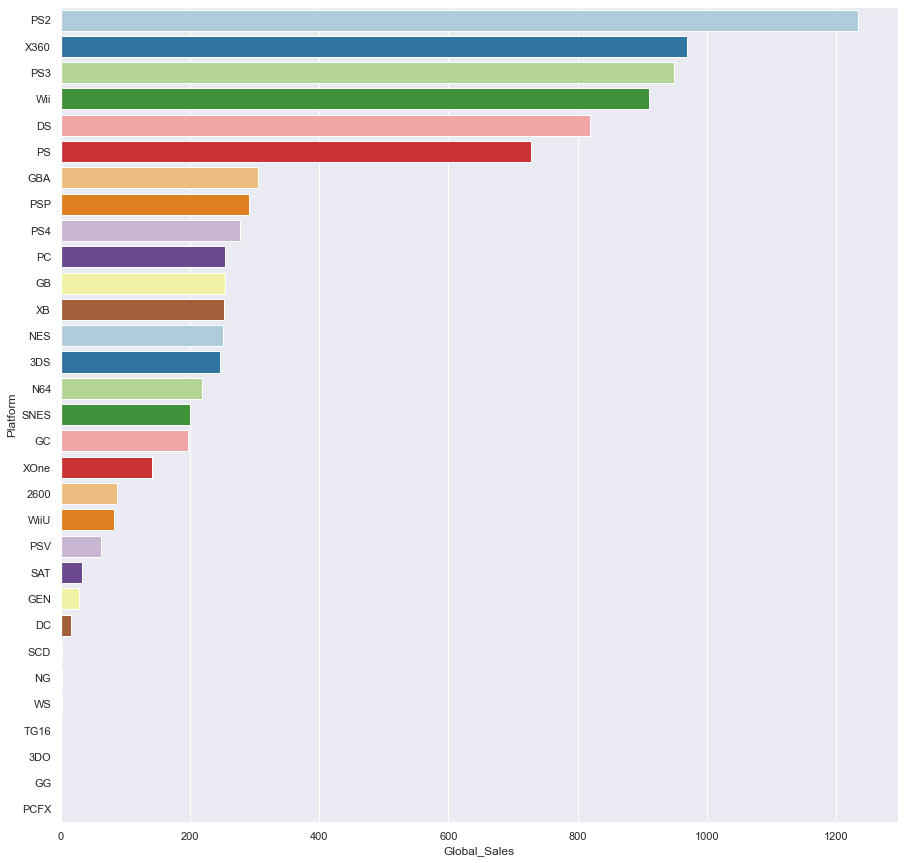

In [92]:
plt.figure(figsize = (15, 15))
sns.barplot( x='Global_Sales', y='Platform', data=grafico1, palette ='Paired')
plt.show()

## 2 - Quais os gêneros de jogos mais populares no mundo em número de vendas? E por  (NA, EU, JA, Resto do mundo)?

In [93]:
# Criando dataframe agrupando os valores de vendas por região.
# Também criei uma coluna com o valor percentual por linha para facilitar a leitura dos dados

grafico2 = games1[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values(['Global_Sales'], ascending=False).reset_index()
grafico2['Percentual_Vendas'] = grafico2['Global_Sales'].apply(lambda x: 100 * x / grafico2['Global_Sales'].sum()).round(2)

grafico3 = games1[['Genre', 'NA_Sales']].groupby('Genre').sum().sort_values(['NA_Sales'], ascending=False).reset_index()
grafico3['Percentual_Vendas'] = grafico3['NA_Sales'].apply(lambda x: 100 * x / grafico3['NA_Sales'].sum()).round(2)

grafico4 = games1[['Genre', 'EU_Sales']].groupby('Genre').sum().sort_values(['EU_Sales'], ascending=False).reset_index()
grafico4['Percentual_Vendas'] = grafico4['EU_Sales'].apply(lambda x: 100 * x / grafico4['EU_Sales'].sum()).round(2)

grafico5 = games1[['Genre', 'JP_Sales']].groupby('Genre').sum().sort_values(['JP_Sales'], ascending=False).reset_index()
grafico5['Percentual_Vendas'] = grafico5['JP_Sales'].apply(lambda x: 100 * x / grafico5['JP_Sales'].sum()).round(2)

grafico6 = games1[['Genre','Other_Sales']].groupby('Genre').sum().sort_values(['Other_Sales'], ascending=False).reset_index()
grafico6['Percentual_Vendas'] = grafico6['Other_Sales'].apply(lambda x: 100 * x / grafico6['Other_Sales'].sum()).round(2)


## 2.1 - Genero de jogos mais populares no mundo em número de vendas

### <font color='blue'> R. Os jogos de ação dominam as vendas totais de jogos com 19,53% totais das vendas no dataset. Já  nas demais posições existe um certo equilibrio entre os gêneros de jogos dos gêneros Shooter, Role-Playing, Platform, Misc e Racing que estão nas posições 3 a 7 respectivamente. </font></font>

In [94]:
grafico2.set_index(np.arange(1, len(grafico2)+1))

,Genre,Global_Sales,Percentual_Vendas
1,Action,1722.84,19.55
2,Sports,1309.23,14.86
3,Shooter,1026.20,11.65
4,Role-Playing,923.83,10.48
5,Platform,829.13,9.41
6,Misc,789.87,8.96
7,Racing,726.76,8.25
8,Fighting,444.05,5.04
9,Simulation,389.98,4.43
10,Puzzle,242.21,2.75


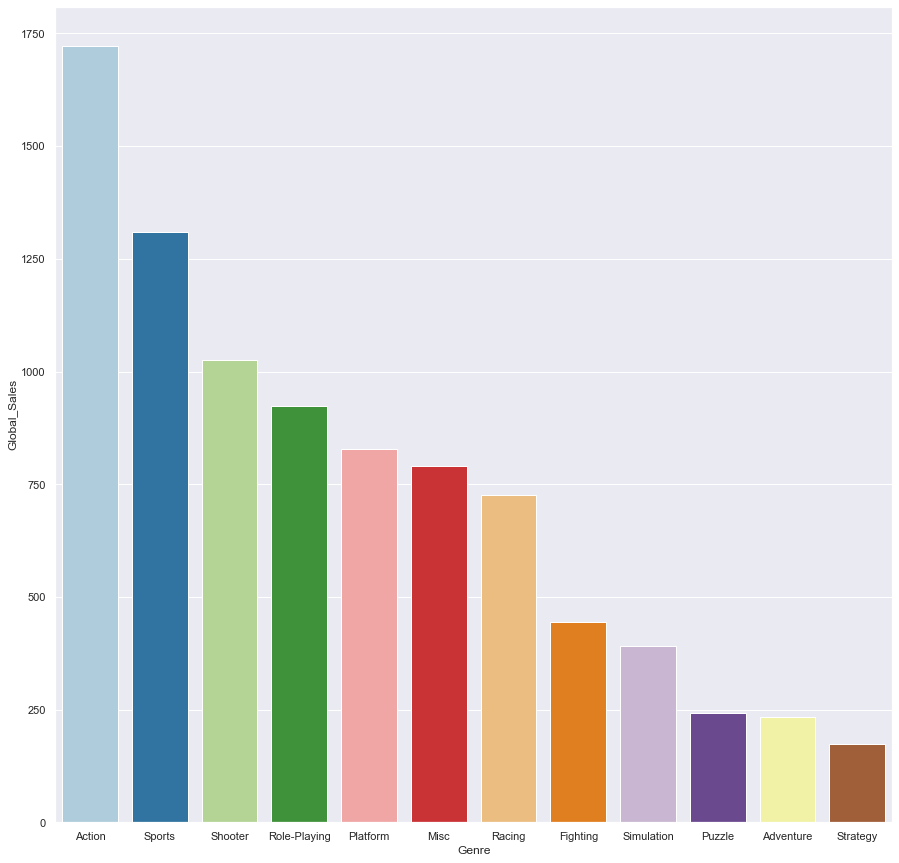

In [95]:
plt.figure(figsize = (15, 15))
sns.barplot( x='Genre', y='Global_Sales', data=grafico2, palette ='Paired')
plt.show()

## 2.2 - Comparativo dos generos por região


### <font color='blue'> R. Já observando os números de vendas dos gêneros por região, observamos que as vendas no Japão são  diferentes do que nas demais regiões. </font>
### <font color='blue'> Enquanto nas regiões NA, EU e "Restante do mundo" os top 3 gêneros são Action, Sports e Shooter com percentuais de vendas relativamente proximos. No Japão o gênero Role-Playing domina as vendas com mais que o dobro do segundo gênero no ranking. </font>
### <font color='blue'> Logo abaixo apresentei os numeros por região e criei um gráfico com as 4 regiões juntas para melhor compreensão dos valores. </font>

In [96]:
grafico3.set_index(np.arange(1, len(grafico3)+1))

,Genre,NA_Sales,Percentual_Vendas
1,Action,861.77,19.91
2,Sports,670.09,15.48
3,Shooter,575.16,13.29
4,Platform,445.99,10.31
5,Misc,396.92,9.17
6,Racing,356.93,8.25
7,Role-Playing,326.50,7.54
8,Fighting,220.74,5.10
9,Simulation,181.78,4.20
10,Puzzle,122.01,2.82


In [97]:
grafico4.set_index(np.arange(1, len(grafico4)+1))

,Genre,EU_Sales,Percentual_Vendas
1,Action,516.48,21.46
2,Sports,371.33,15.43
3,Shooter,310.45,12.90
4,Racing,236.31,9.82
5,Misc,211.77,8.80
6,Platform,200.65,8.34
7,Role-Playing,187.57,7.79
8,Simulation,113.02,4.70
9,Fighting,100.00,4.16
10,Adventure,63.74,2.65


In [98]:
grafico5.set_index(np.arange(1, len(grafico5)+1))

,Genre,JP_Sales,Percentual_Vendas
1,Role-Playing,350.29,27.28
2,Action,158.65,12.35
3,Sports,134.76,10.49
4,Platform,130.65,10.17
5,Misc,106.67,8.31
6,Fighting,87.15,6.79
7,Simulation,63.54,4.95
8,Puzzle,56.68,4.41
9,Racing,56.61,4.41
10,Adventure,51.99,4.05


In [99]:
grafico6.set_index(np.arange(1, len(grafico6)+1))

,Genre,Other_Sales,Percentual_Vendas
1,Action,184.92,23.44
2,Sports,132.65,16.81
3,Shooter,101.90,12.92
4,Racing,76.68,9.72
5,Misc,73.92,9.37
6,Role-Playing,59.38,7.53
7,Platform,51.51,6.53
8,Fighting,36.19,4.59
9,Simulation,31.36,3.98
10,Adventure,16.70,2.12


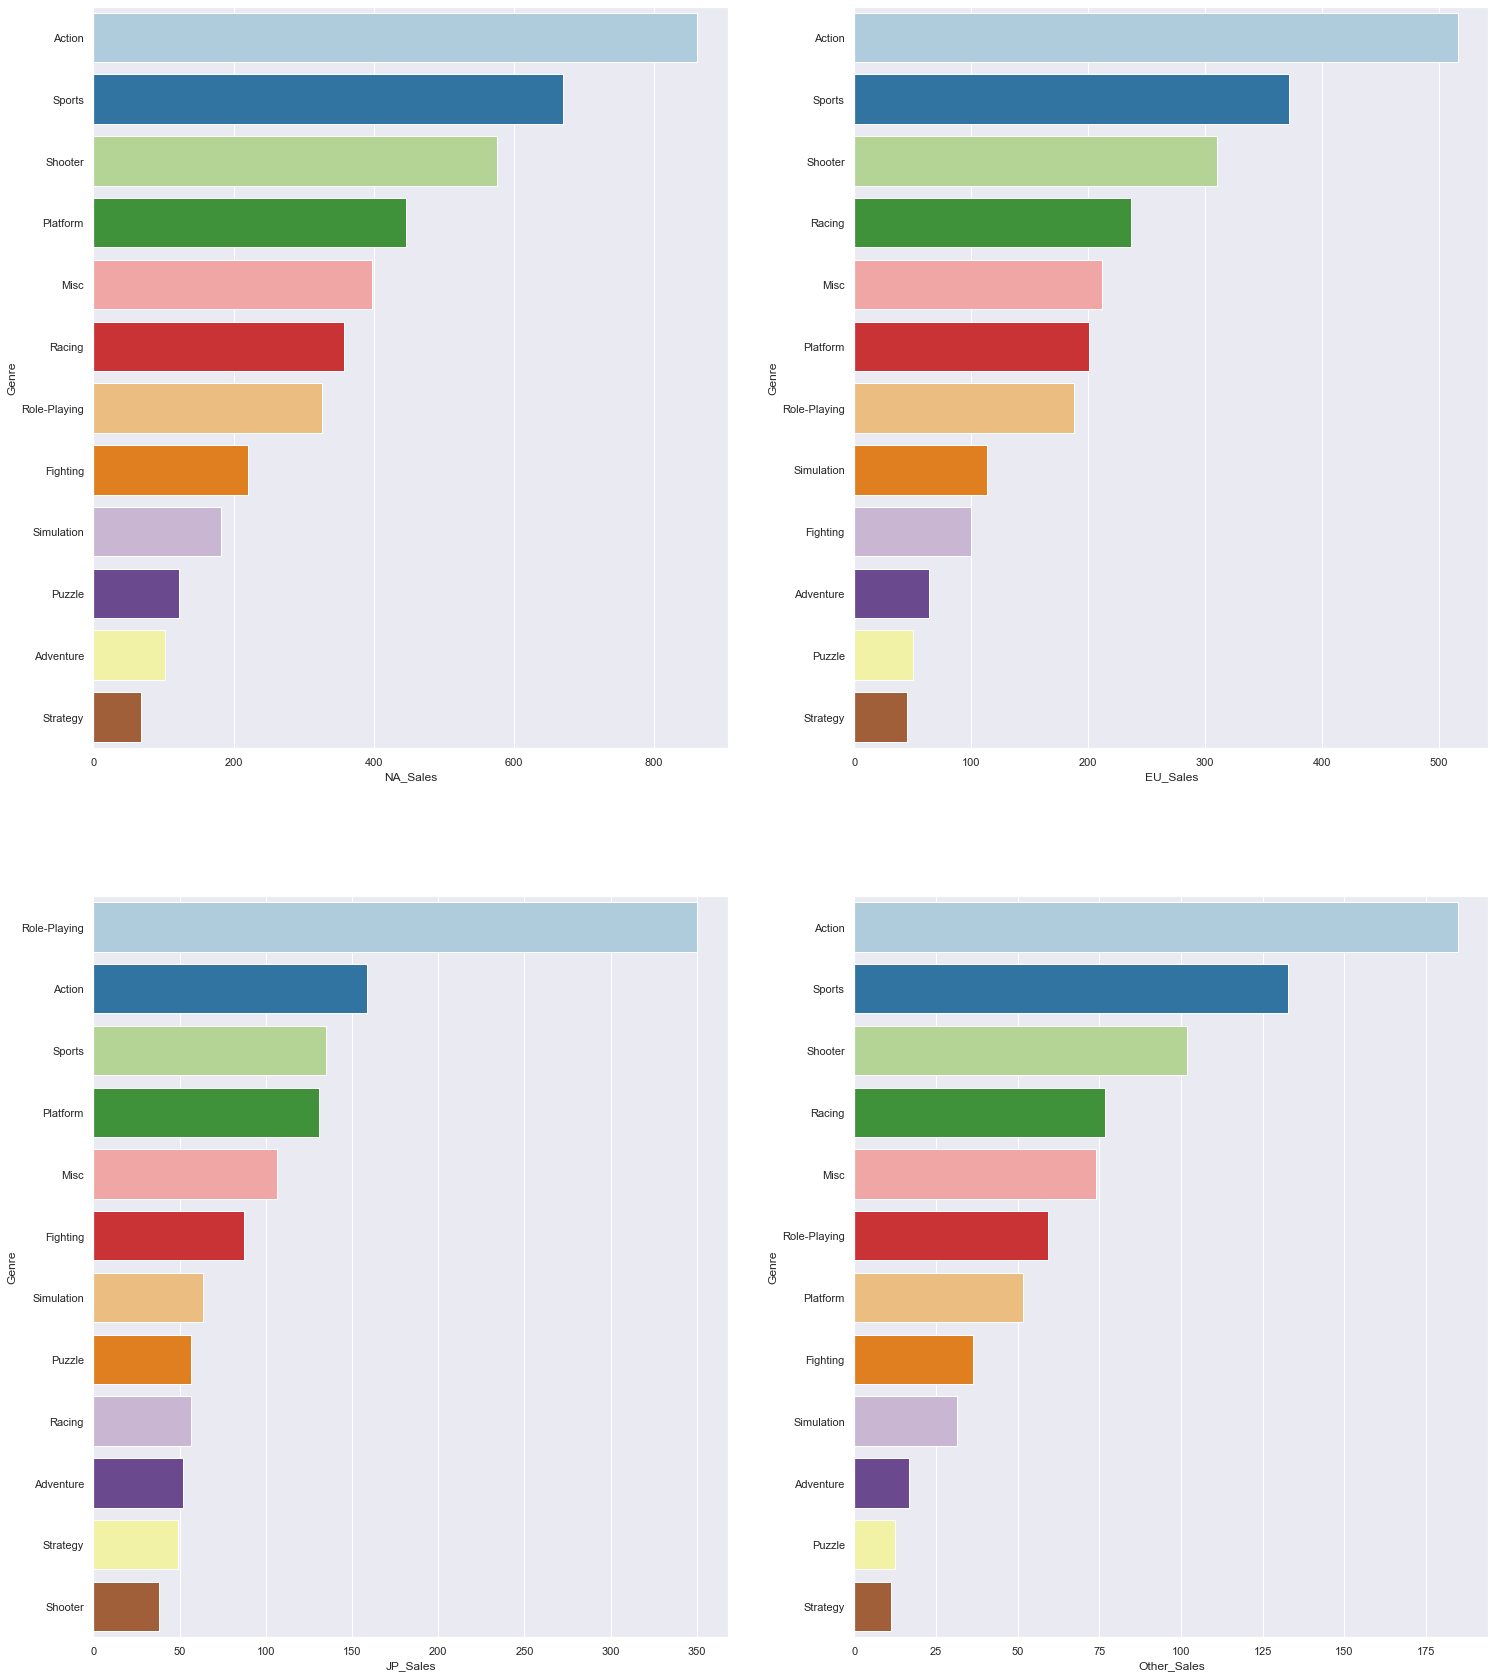

In [100]:
plt.figure(figsize = (25, 30))
plt.subplot(2, 2, 1)
sns.barplot( x='NA_Sales', y='Genre', data=grafico3, palette ='Paired')
plt.subplot(2, 2, 2)
sns.barplot( x='EU_Sales', y='Genre', data=grafico4, palette ='Paired')
plt.subplot(2, 2, 3)
sns.barplot( x='JP_Sales', y='Genre', data=grafico5, palette ='Paired')
plt.subplot(2, 2, 4)
sns.barplot( x='Other_Sales', y='Genre', data=grafico6, palette ='Paired')
plt.show()

# P.3 - Ao longo das decadas, a quantidade de jogos lançados por gênero sofreu grande alterações?

### <font color='blue'> R. Nos gráficos abaixos, podemos notar que nos anos 80 o gênero action dominava o número de títulos lançados com o dobro de jogos lançados para o segundo gênero no ranking (Platform).</font>

### <font color='blue'> Já nos anos 90 é possível notar nos graficos um certo equilibrio na quantidade de títulos lançados por gênero. Nortei também uma forte queda no percentual de titulos lançados no gênero Action lider do ranking na década anterior e um salto no percentual dos gêneros Fighting, Racing e Role-Playing.</font>

### <font color='blue'> Nos anos 2000 o gênero Action volta a ter o maior percentual de jogos lançados e o Sport continua com percentual proximo ao da década passada.</font>

### <font color='blue'> Na década de 2010 o gráfico volta a ficar muito parecido com o dos anos 80, com o gênero Action voltando a ter mais que o dobro do percentual de títulos que o segundo gênero Sports.</font>



In [101]:
grafico7 = games1[['Decade', 'Genre', 'Global_Sales']].groupby(['Decade', 'Genre']).count().sort_values(['Decade','Global_Sales'], ascending=False).reset_index().rename(columns={"Global_Sales": "Count"})
grafico7

,Decade,Genre,Count
0,90's,Sports,304
1,90's,Fighting,193
2,90's,Racing,183
3,90's,Role-Playing,172
4,90's,Action,162
5,90's,Shooter,137
6,90's,Platform,125
7,90's,Strategy,123
8,90's,Misc,116
9,90's,Adventure,97


In [102]:
year80 = grafico7[['Genre', 'Count']][grafico7['Decade'] == "80's"].sort_values(['Count'], ascending=False).set_index('Genre')
year90 = grafico7[grafico7['Decade'] == "90's"].sort_values(['Count'], ascending=False).set_index('Genre')
year2000 = grafico7[grafico7['Decade'] == "2000's"].sort_values(['Count'], ascending=False).set_index('Genre')
year2010 = grafico7[grafico7['Decade'] == "2010's"].sort_values(['Count'], ascending=False).set_index('Genre')


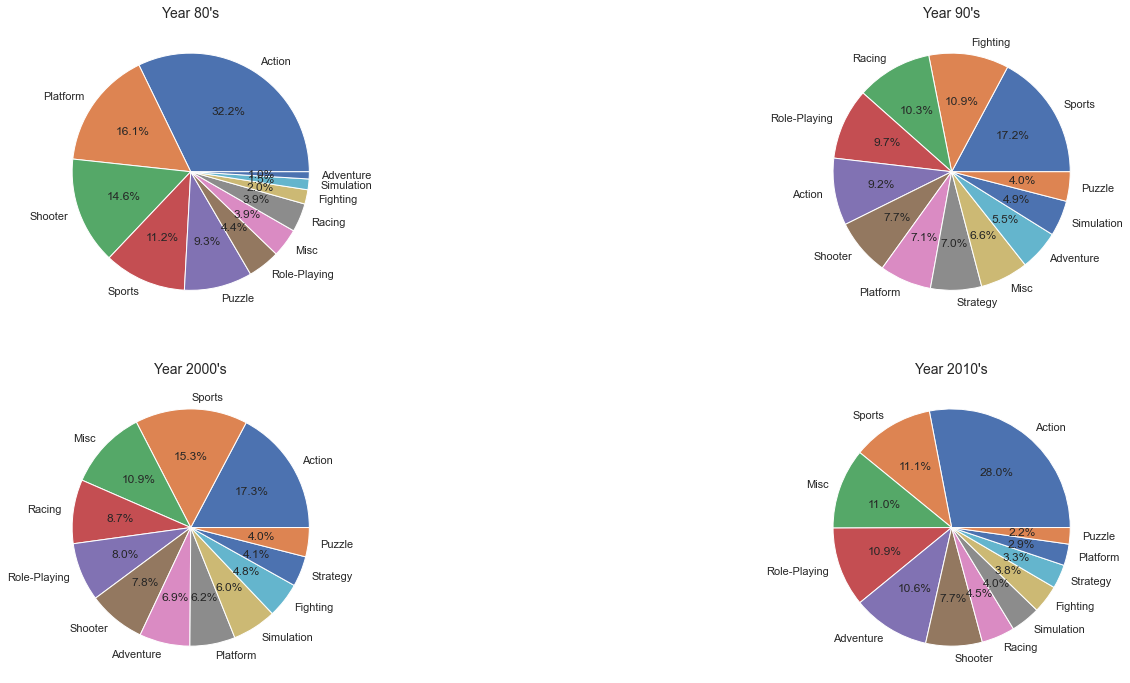

In [103]:
plt.subplot(2, 2, 1)
plt.title("Year 80's", fontsize=14)
plt.pie(x = year80['Count'], autopct="%.1f%%", labels = year80.index)

plt.subplot(2, 2, 2)
plt.title("Year 90's", fontsize=14)
plt.pie(x = year90['Count'], autopct="%.1f%%", labels = year90.index)

plt.subplot(2, 2, 3)
plt.title("Year 2000's", fontsize=14)
plt.pie(x = year2000['Count'], autopct="%.1f%%", labels = year2000.index)

plt.subplot(2, 2, 4)
plt.title("Year 2010's", fontsize=14)
plt.pie(x = year2010['Count'], autopct="%.1f%%", labels = year2010.index)


plt.show()


# P.4 - Quais foram os jogos mais vendido de todos os tempos? E qual a Publisher que mais vendeu jogos?


### <font color='blue'> R. Wii Sports é disparado o jogo mais vendido do dataset com 82.74 milhões.</font>
### <font color='blue'>Apesar do gênero Action ter o maior número de vendas, é um jogo do gênero Sports o mais vendido do dataset. E dentro do top 10 dos mais vendidos, apenas 1 título é do gênero Action. </font>

### <font color='blue'> E a nintendo é a maior Publisher com 28,7% das vendas desse dataset. </font>


In [104]:
grafico8 = games1[['Name', 'Genre', 'Publisher', 'Global_Sales']].groupby(['Name', 'Genre', 'Publisher']).sum().sort_values(['Global_Sales'], ascending=False).reset_index()
grafico8[:10].set_index(np.arange(1, len(grafico8[:10])+1))

,Name,Genre,Publisher,Global_Sales
1,Wii Sports,Sports,Nintendo,82.74
2,Grand Theft Auto V,Action,Take-Two Interactive,55.92
3,Super Mario Bros.,Platform,Nintendo,45.31
4,Tetris,Puzzle,Nintendo,35.84
5,Mario Kart Wii,Racing,Nintendo,35.82
6,Wii Sports Resort,Sports,Nintendo,33.00
7,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,31.37
8,Call of Duty: Modern Warfare 3,Shooter,Activision,30.83
9,New Super Mario Bros.,Platform,Nintendo,30.01
10,Call of Duty: Black Ops II,Shooter,Activision,29.72


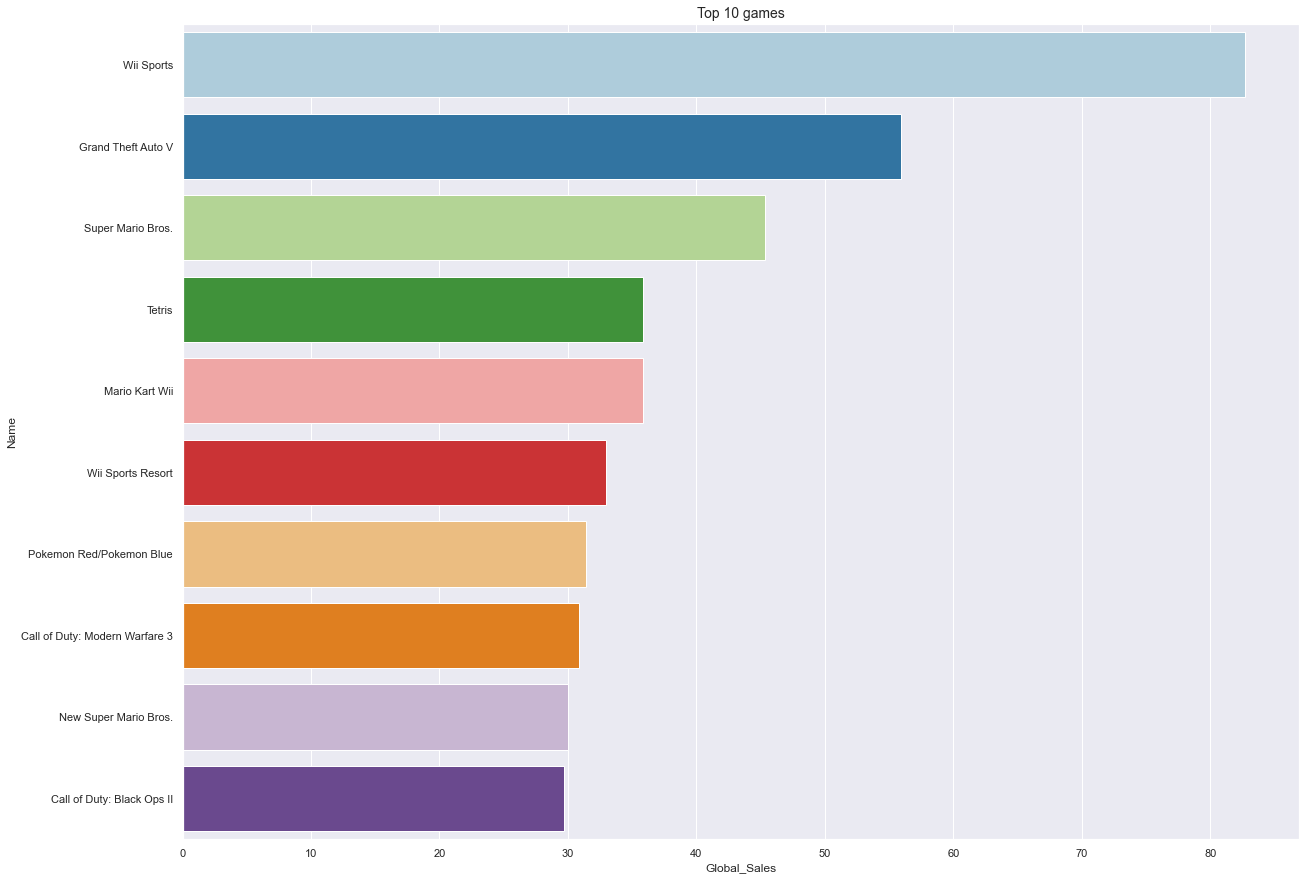

In [105]:
plt.figure(figsize = (20, 15))
sns.barplot( x='Global_Sales', y='Name', data=grafico8[:10], palette ='Paired')
plt.title('Top 10 games', fontsize=14)
plt.show()

In [106]:
grafico9 = games1[['Publisher', 'Global_Sales']].groupby(['Publisher']).sum().sort_values(['Global_Sales'], ascending=False).reset_index()
grafico9[:10].set_index(np.arange(1, len(grafico9[:10])+1))

,Publisher,Global_Sales
1,Nintendo,1784.43
2,Electronic Arts,1093.38
3,Activision,721.41
4,Sony Computer Entertainment,607.28
5,Ubisoft,473.54
6,Take-Two Interactive,399.30
7,THQ,340.44
8,Konami Digital Entertainment,278.56
9,Sega,270.70
10,Namco Bandai Games,253.65


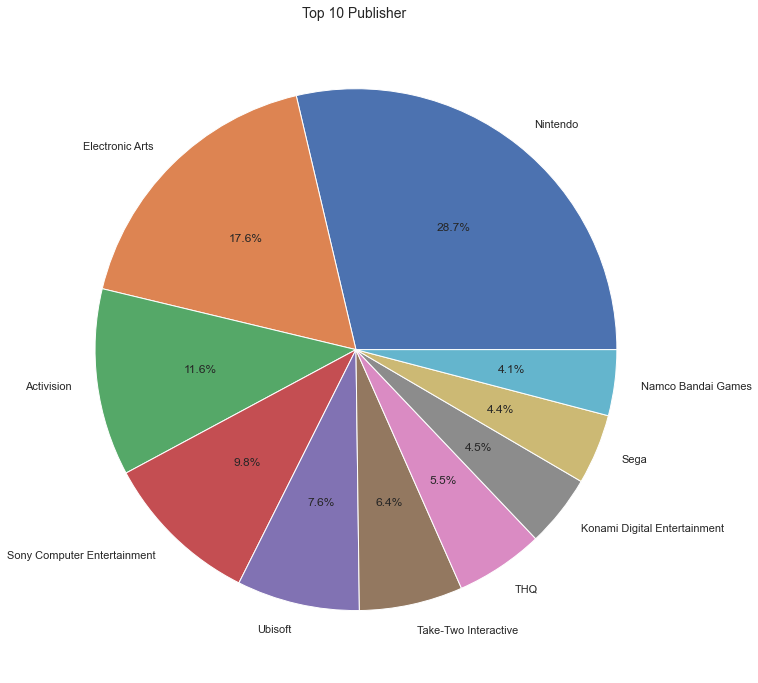

In [107]:
plt.title("Top 10 Publisher ", fontsize=14)
plt.pie(x = grafico9[:10]['Global_Sales'], autopct="%.1f%%", labels = grafico9[:10]['Publisher'])
plt.show()

# 4 - Conclusão

### Após a análise podemos notar que com excessão a região do Japão, os jogadores possuem preferência semelhantes para os gêneros dos jogos preferindo jogos de Action, Sports e Shooter.

### A Nintendo é com grande vantagem a maior publisher com 28,7% das vendas e possuindo 7 jogos no top 10 de jogos mais vendidos.

### E com relação as plataformas, temos um dominio do playstation com o PS2 disparado em primeiro e o PS3 em terceiro.

## 4.1 - Fatores limitantes

### Não identifiquei nenhum fator limitante. O dataset foi disponibilizado "limpo", praticamente sem problemas.

### Com relação as minhas análises, como no dataset só existe o ano de lançamento do jogo e não existe os período de tempo em que essas vendas ocorreram, decidir ignorar as analises relativas a tempo. 
### Por conta disso não realizei nenhuma analise sobre o aumento de vendas de jogos entre as décadas, já que é bem comum (principalmente nos anos 80 e 90) jogos venderem durante muitos anos e as vendas entrarem na década seguinte, fazendo que esse tipo de análise não faça sentindo.
